In [55]:
##Import modules etc.
import skimage.io as io
io.use_plugin('tifffile')
import glob
import os
import time
import pandas as pd
import numpy as np
import itertools
import mahotas as mh
from mahotas.labeled import filter_labeled
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from skimage.measure import regionprops
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from skimage.morphology import remove_small_objects

from scipy import ndimage
from scipy.ndimage import morphology

from skimage.measure import find_contours

In [2]:
#[1] Get targeted filelist
path='C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments/Output/'

target='_Mask5.npy'

filelist=glob.glob(path+str('*')+target)

In [11]:
filepath = filelist[2]

In [46]:
#load Hoechst and GFP stacks from .ome.tif files
def load_ome(ome_stack_file):

    #MMStack .ome.tif files load channel,z,y,x
    #Check file contains .ome.tif
    if '.ome.tif' in ome_stack_file:

        #Load the file
        im=io.imread(ome_stack_file)

        #Select Hoechst stack
        Hoechst_stack = im[0,:,:,:] #Hoechst Channel = 0
        GFP_stack = im[1,:,:,:]     #GFP Channel = 1
        
        #
        return [Hoechst_stack, GFP_stack]
        #return GFP_stack
        
    else:
        print 'this is not an ome.tif'

In [12]:
mask5 = np.load(filepath)

In [13]:
filename = os.path.basename(filepath) 

In [16]:
z = 12
stackname= filename.replace('Mask5.npy', str('z'+str(z)))

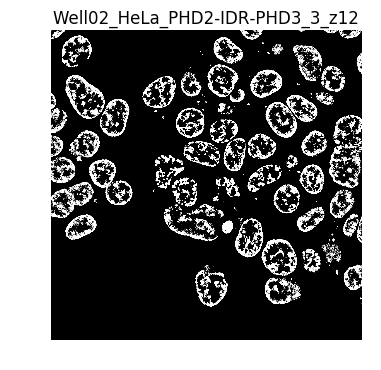

In [18]:
plt.imshow(mask5[z], cmap='gray')
plt.axis('off')
plt.title(stackname)

In [21]:
#Get shell list
shell_list=glob.glob(path+str('/Shells/*Shells.npy'))

In [22]:
shell_list[4]

'C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments/Output//Shells\\Well02_HeLa_PHD2-IDR-PHD3_3_Shells.npy'

In [23]:
#Load shells
mask6 = np.load(shell_list[4])

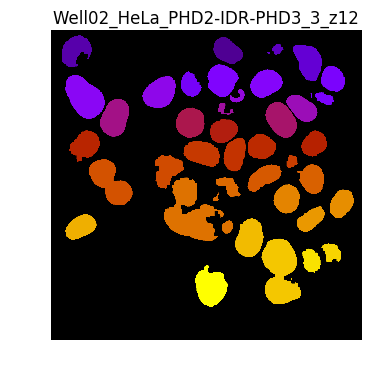

In [60]:
plt.imshow(mask6[z], cmap="gnuplot")
plt.axis('off')
plt.title(stackname)

In [33]:
shell_list[5]

'C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments/Output//Shells\\Well02_HeLa_PHD2-IDR-PHD3_2_Split_Shells.npy'

In [36]:
#Load split shells
mask7 = np.load(shell_list[5])

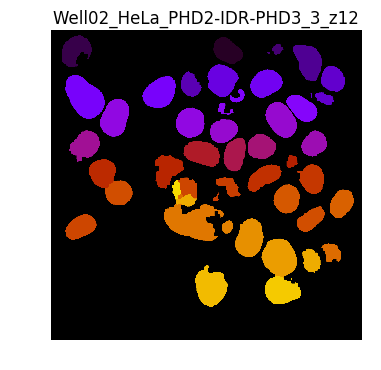

In [59]:
plt.imshow(mask7[z], cmap="gnuplot")
plt.axis('off')
plt.title(stackname)

In [38]:
#Operate on z-stack
def stackOutlines(stack):
    
    outline_stack=[]

    #iterate through z-slices
    for z, frame in enumerate(stack):

        outlines=[]

        #iterate through objects
        for l in range(frame.max()):
            ll=l+1
            outlines.append(find_contours(frame==ll, 0.8))

        outline_stack.append(outlines)        
                
    return outline_stack

In [82]:
##Find outlines for each object
outline_stack = stackOutlines(mask7)

In [48]:
#Get targeted filelist
path='C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments/'

target='.ome.tif'

filelist=glob.glob(path+str('*')+target)

In [50]:
filelist[2]

'C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments\\Well02_HeLa_PHD2-IDR-PHD3_3_MMStack_Pos0.ome.tif'

In [53]:
#Load tif files
[Hoechst_stack, GFP_stack] = load_ome(filelist[2])

In [84]:
#Flatten a single z-slice
flattened_list  = list(itertools.chain(*outline_stack[z]))

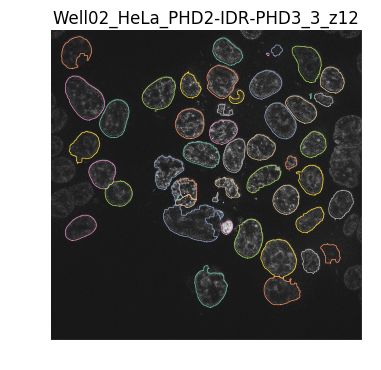

In [85]:
##Plot the right way up
fig, ax = plt.subplots()
ax.imshow(Hoechst_stack[z], cmap='gray')
ax.axis('off')

#Set the color palette
ax.set_color_cycle(sns.color_palette("Set2", len(flattened_list)))

for n, line in enumerate(flattened_list):
    ax.plot(line[:, 1], line[:, 0], linewidth=0.5)
    
    #Careful setting these, as you can easily flip the y axis
    ax.set_xlim(0,len(Hoechst_stack[1]))
    ax.set_ylim(len(Hoechst_stack[2]),0)
    
plt.title(stackname)

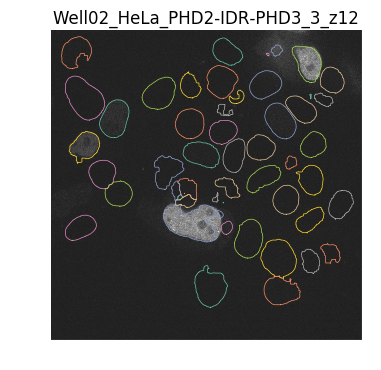

In [86]:
##Plot the right way up
fig, ax = plt.subplots()
ax.imshow(GFP_stack[z], cmap='gray')
ax.axis('off')

#Set the color palette
ax.set_color_cycle(sns.color_palette("Set2", len(flattened_list)))

for n, line in enumerate(flattened_list):
    ax.plot(line[:, 1], line[:, 0], linewidth=0.5)
    
    #Careful setting these, as you can easily flip the y axis
    ax.set_xlim(0,len(GFP_stack[1]))
    ax.set_ylim(len(GFP_stack[2]),0)
    
plt.title(stackname)